# Ensemble Learning

## Introduction

Ensemble learning is a machine learning technique that combines several base models to produce one optimal predictive model. The idea is to leverage the strengths of each model to improve the overall performance and robustness of the prediction.

### Types of Ensemble Learning

1. **Bagging (Bootstrap Aggregating)**: Involves training multiple versions of a model on different subsets of the training data and then averaging their predictions.
2. **Boosting**: Involves training models sequentially, each trying to correct the errors of the previous one.
3. **Stacking**: Involves training multiple models and using another model to combine their predictions.

## Preparation

Before implementing ensemble methods, we need to prepare our data. We'll use the Breast Cancer Wisconsin dataset from sklearn for this example.




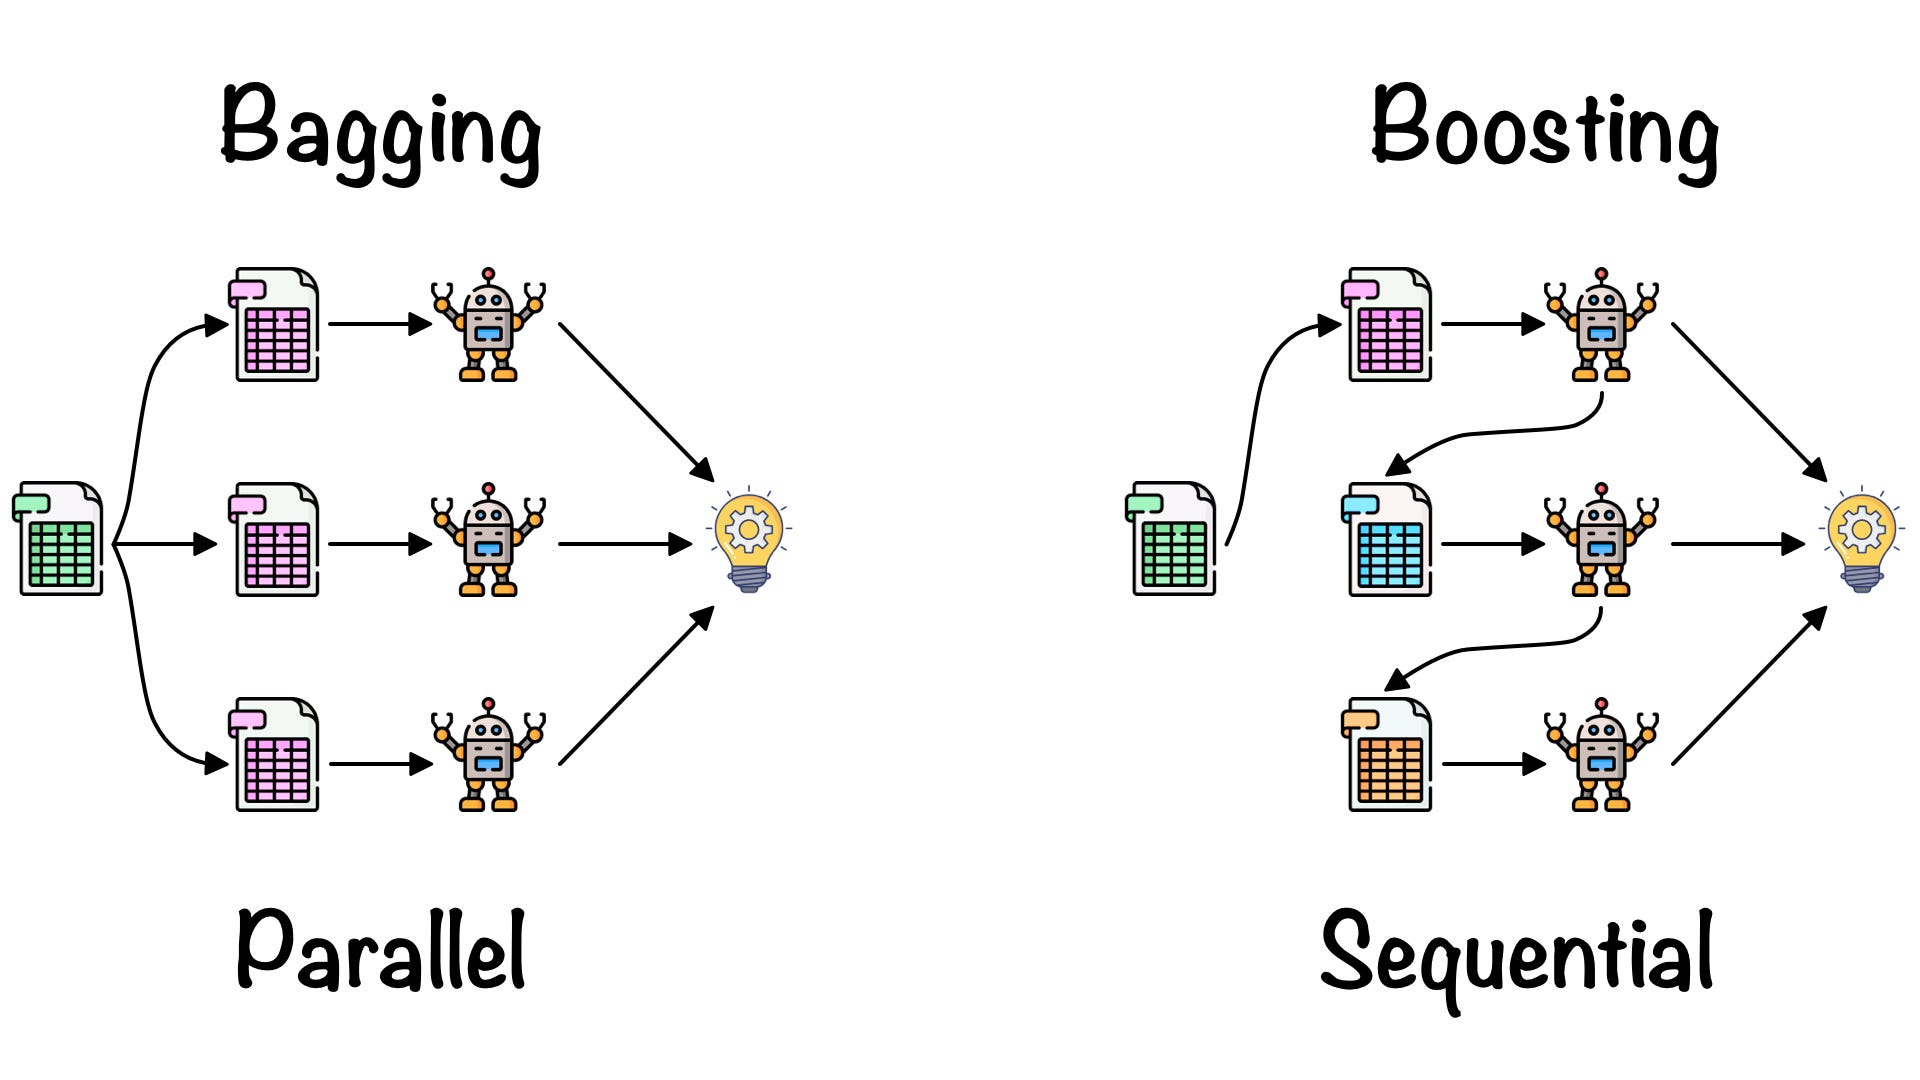

# Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, \
AdaBoostClassifier, \
GradientBoostingClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, \
confusion_matrix, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Exploring the Data

In [5]:
# Load the dataset
cancer = load_breast_cancer()


df = pd.DataFrame(cancer.data, columns=cancer.feature_names)


df['target'] = cancer.target

# Display the first few rows of the dataset
df.sample()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
440,10.97,17.2,71.73,371.5,0.08915,0.1113,0.09457,0.03613,0.1489,0.0664,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.1555,0.254,0.09532,1


# Workflow
Step 1: Data Preprocessing

In [6]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = \
train_test_split(X, y, 
                 test_size=0.2, 
                 random_state=42)


In [12]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 2: Model Implementation
### Bagging with Random Forest

In [13]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, 
                                  random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [16]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, 
                                  y_pred_rf))

Accuracy: 0.9649122807017544


In [17]:
print(confusion_matrix(y_test, y_pred_rf))


[[40  3]
 [ 1 70]]


In [20]:
# print(classification_report(y_test, y_pred_rf))

# Boosting with AdaBoost

In [21]:
# Initialize and train the AdaBoost model

ada_model = AdaBoostClassifier(n_estimators=100, 
                               random_state=42)

ada_model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [22]:
# Make predictions
y_pred_ada = ada_model.predict(X_test)

y_pred_ada

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [24]:
# Evaluate the model
print(accuracy_score(y_test, y_pred_ada))

0.9736842105263158


In [25]:
print(confusion_matrix(y_test, y_pred_ada))

[[41  2]
 [ 1 70]]


In [26]:
# print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Boosting with Gradient Boosting

In [27]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, 
                                      random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)


In [29]:
# Evaluate the model
print(accuracy_score(y_test, y_pred_gb))

0.956140350877193


In [30]:
print(confusion_matrix(y_test, y_pred_gb))

[[40  3]
 [ 2 69]]


In [31]:
# print("Classification Report:\n", classification_report(y_test, y_pred_gb))
# # 

In [32]:
model = ['RF','ADA','GB']

score = [accuracy_score(y_test, y_pred_rf),
         accuracy_score(y_test, y_pred_ada),
         accuracy_score(y_test, y_pred_gb)
        ]



model_per = dict(zip(model,score))

model_per_df = pd.DataFrame(model_per,
                            index=[1])

model_per_df

,RF,ADA,GB
1,0.964912,0.973684,0.95614


<Axes: >

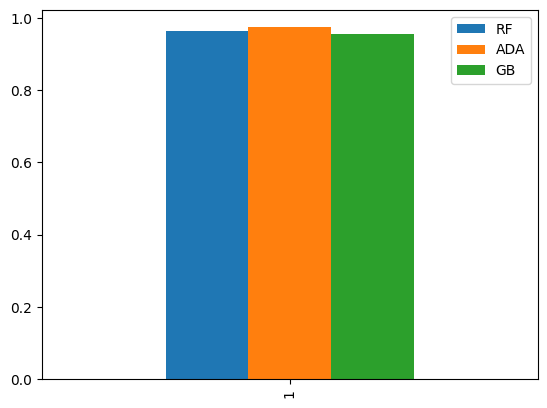

In [36]:
model_per_df.plot(kind='bar')